## Adam (Adaptive Moment Estimation) Optimization

In [1]:
from IPython.display import Image

Adam optimization combines ideas behind Momentum Optimization and RMSProp Optimization.

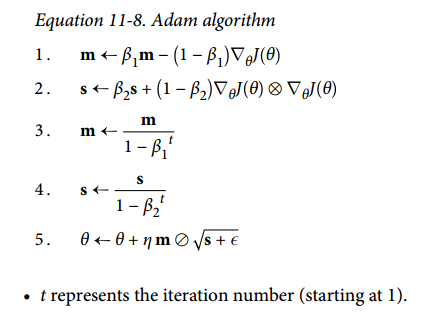

In [2]:
Image(filename='images/adam-optimization.png')

Like Momentum, Adam keeps track of an exponentially decaying average of past gradients.

Like RMSProp, Adam keeps tract of an exponentially decaying average of past squared gradients.

Equation 1, 2, and 5 shows that Adam is similar to both Momentum and RMSProp.

In the first step, it computes an exponentially decaying average rather than an exponentially decaying sum. Actually, decaying average is (1 - beta_1) times the decaying sum.

Step 3 and 4 helps boost m and s at the beginning of the training process because both m and s are initialized to 0 (biased to 0 at the beginning of training).

beta_1 usually takes the value of 0.9 and 0.999 for beta_2. These are default values used by TensorFlow's AdamOptimizer, and we usually don't need to tweak these hyperparameters.

Adam is an adaptive learning rate algorithm, so it requires less tuning of the learning rate hyperparameter. We can just use the default value 0.001 for learning rate.

Adam is generally considered faster and better than other optimization methods. However, recent researchs show that adaptive methods like AdaGrad, RMSProp and Adam generalize poorly on some datasets. As a result, we should stick with Momentum or Nesterov Accelerated Gradient first before trying adaptive methods.

### Traning Sparse Models
All optimization algorithms including Momentum, Nesterov, AdaGrad, RMSProp and Adam produce dense models (models with most parameters be nonzero).

We may need to use sparse models if we want a fast model at runtime or a model that uses less memory. 

A simple way to create sparse model is to train the model as usual, then remove tiny weights.

Another technique using **Dual Averaging** called **Follow The Regularized Leader (FTRL)** can be used to create sparse models.

TensorFlow: https://www.tensorflow.org/api_docs/python/tf/train/FtrlOptimizer

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
tf.reset_default_graph()
n_inputs = 784
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10
learning_rate = 0.01

In [5]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [6]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=tf.nn.elu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=tf.nn.elu, name="hidden2")
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [7]:
with tf.name_scope("loss"):
    xen = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xen, name="loss")

In [8]:
with tf.name_scope("train"):
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(loss)

In [9]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [10]:
init = tf.global_variables_initializer()

In [11]:
n_epochs = 100
batch_size = 100
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [12]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(len(mnist.test.labels) // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

0 Train accuracy: 0.91 Test accuracy: 0.9203
1 Train accuracy: 0.96 Test accuracy: 0.9297
2 Train accuracy: 0.95 Test accuracy: 0.9417
3 Train accuracy: 0.98 Test accuracy: 0.9421
4 Train accuracy: 0.96 Test accuracy: 0.9448
5 Train accuracy: 0.98 Test accuracy: 0.9497
6 Train accuracy: 0.97 Test accuracy: 0.9482
7 Train accuracy: 0.99 Test accuracy: 0.9562
8 Train accuracy: 0.97 Test accuracy: 0.9474
9 Train accuracy: 0.97 Test accuracy: 0.9548
10 Train accuracy: 0.98 Test accuracy: 0.9604
11 Train accuracy: 0.98 Test accuracy: 0.9623
12 Train accuracy: 0.97 Test accuracy: 0.952
13 Train accuracy: 0.97 Test accuracy: 0.9618
14 Train accuracy: 0.98 Test accuracy: 0.9495
15 Train accuracy: 0.99 Test accuracy: 0.9556
16 Train accuracy: 0.96 Test accuracy: 0.9659
17 Train accuracy: 0.98 Test accuracy: 0.9555
18 Train accuracy: 0.97 Test accuracy: 0.9619
19 Train accuracy: 0.99 Test accuracy: 0.9636
20 Train accuracy: 1.0 Test accuracy: 0.9645
21 Train accuracy: 1.0 Test accuracy: 0.9635
2